<a href="https://colab.research.google.com/github/TomPhanAnh/Kaggle-Solution/blob/main/Food%20Demand%20Forecasting%20-%20Low%20Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Food Demand Forecasting**
Predict the number of orders for upcoming 10 weeks

## **Overview**

***1) Context***

***2) Content***

***3) Used Python Libraries***

***4) Know Dataset Nature***

***5) Light Data Exploration***

***6) Data Normalization***

***7) Light Data Exploration***

***8) Data Normalization***

***9) Feature Selection***

***10) Model Buliding***

***11) Conclusion***

***12) Applying Algorithm***

## **Context**
It is a meal delivery company which operates in multiple cities. They have various fulfillment centers in these cities for dispatching meal orders to their customers. The client wants you to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.

## **Content**
The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set

## **Acknowledgements**
Analytics Vidhya

## **Inspiration**
Forecasting accurately could male the business growth in well directed direction.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

## Mounting Google Drive locally
Mount the Google Driver into the Google Colab Driver.

[*Hint.*](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=eikfzi8ZT_rW)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

!unzip "/content/drive/MyDrive/Data FPT/test.csv.zip"
!unzip "/content/drive/MyDrive/Data FPT/train.csv.zip"

Mounted at /content/drive
Archive:  /content/drive/MyDrive/Data FPT/test.csv.zip
  inflating: test.csv                
Archive:  /content/drive/MyDrive/Data FPT/train.csv.zip
  inflating: train.csv               


In [ ]:
# Import dataset with train_ds and test_ds
train_ds = pd.read_csv("train.csv")
test_ds  = pd.read_csv("test.csv")
meal_ds  = pd.read_csv("/content/meal_info.csv")
center_ds = pd.read_csv("/content/fulfilment_center_info.csv")

In [ ]:
train_ds.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [ ]:
test_ds.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [ ]:
meal_ds.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [ ]:
center_ds.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


## **Data Understanding**
Now we will have a check ahout 

In [ ]:
train_ds.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [ ]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


## **2) For Categorical Data**
Made bar charts to understand balance of classes

In [ ]:
train_cat = train_ds[['center_id',"meal_id","emailer_for_promotion", "homepage_featured"]]
train_num = train_ds[["week", "checkout_price"]]

# **Explodatory Data Analysis**


In [ ]:
train_ds.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [ ]:
train_ds.head(1)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177


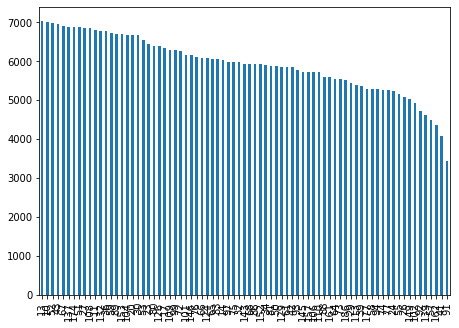

In [ ]:
import seaborn as sns
plt.figure(figsize = (25,18))
plt.subplot(3,3,1)
train_ds["center_id"].value_counts().plot(kind = "bar")

In [ ]:
train_ds["center_id"].value_counts().sort_values()

91     3432
41     4083
162    4366
57     4501
139    4627
       ... 
67     6915
43     6970
52     6993
10     7015
13     7046
Name: center_id, Length: 77, dtype: int64

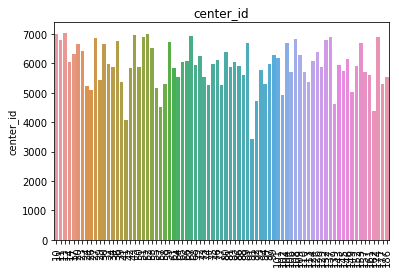

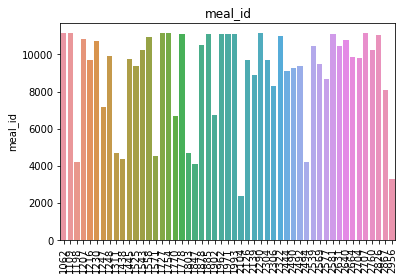

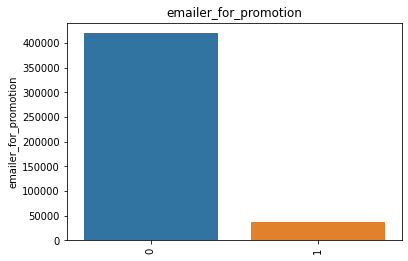

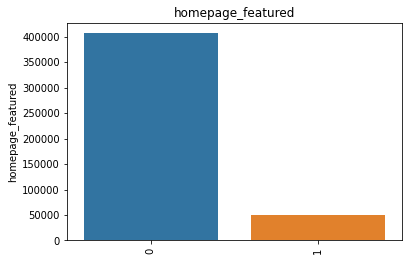

In [ ]:
for i in train_cat.columns:
  plt.xticks(rotation= 90)
  sns.barplot(train_cat[i].value_counts().index, 
              train_cat[i].value_counts()).set_title(i)
  plt.show()

## **Data Normalization**
1. for-loop: here we checked outliers occur or not? "checkout_price" column has occured an outlier.
2. outlinefree(): it is a customise function that help us to figureout and work on outlier value in columns. meanly, it is used to remove outliers value from dataset.
3. for-loop: with the help of for-loop, we are checking the outlinefree() function worked on properly or not.
4. columns ***center_id*** and ***meal_id*** has many categorical values.
5. To manage categorical columns, we use function to create new few sub-categories.

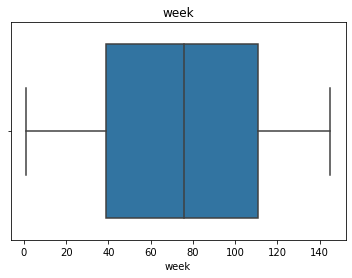

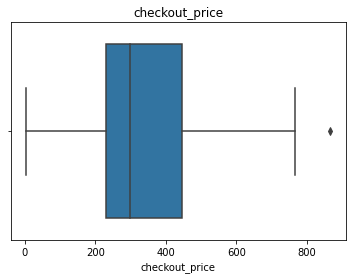

In [ ]:
for i in train_num.columns:
  sns.boxplot(train_num[i])
  plt.title(i)
  plt.show()

### **Function to define outlier**

In [ ]:
def outlinefree(dataCol):
  sorted(dataCol)
  Q1, Q3 = np.percentile(dataCol, [25,75])
  IQR = Q3 - Q1
  LowerRange = Q1 - (1.5*IQR)
  UpperRange = Q3 + (1.5*IQR)
  colname = dataCol.tolist()
  new_list = []
  for i in range(len(colname)):
    if colname[i] > UpperRange:
      colname[i] = UpperRange
      new_list.append(colname[i])
    elif colname[i] < LowerRange:
      colname[i] = LowerRange
      new_list.append(colname[i])
    else:
      colname[i]
      new_list.append(colname[i])
  return new_list

In [ ]:
for i in range(len(train_num.columns)):
  new_list = outlinefree(train_num.loc[:,train_num.columns[i]])
  train_ds.loc[:, train_num.columns[i]] = new_list

In [ ]:
def center_id(datacol):
  center_id_val_index_n = []
  for i in datacol:
    if i>= 10 and i<= 30:
      center_id_val_index_n.append("10-30")
    elif i >= 31 and i <= 50:
      center_id_val_index_n.append("31-50")
    elif i >= 51 and i <= 70:
      center_id_val_index_n.append("51-70")
    elif i >= 71 and i <= 90:
      center_id_val_index_n.append("71-90")
    elif i >= 91 and i <= 110:
      center_id_val_index_n.append("91-110")
    elif i >= 111 and i<=130:
      center_id_val_index_n.append("111-130")
    elif i >= 131 and i<= 150:
      center_id_val_index_n.append("131-150")
    else:
      center_id_val_index_n.append("151-190")
  return center_id_val_index_n

train_ds["center_id"] = center_id(train_ds.center_id)

## **Feature Selection**
1. seaborn.pairplot(): it is help to figure out relation between features and labels

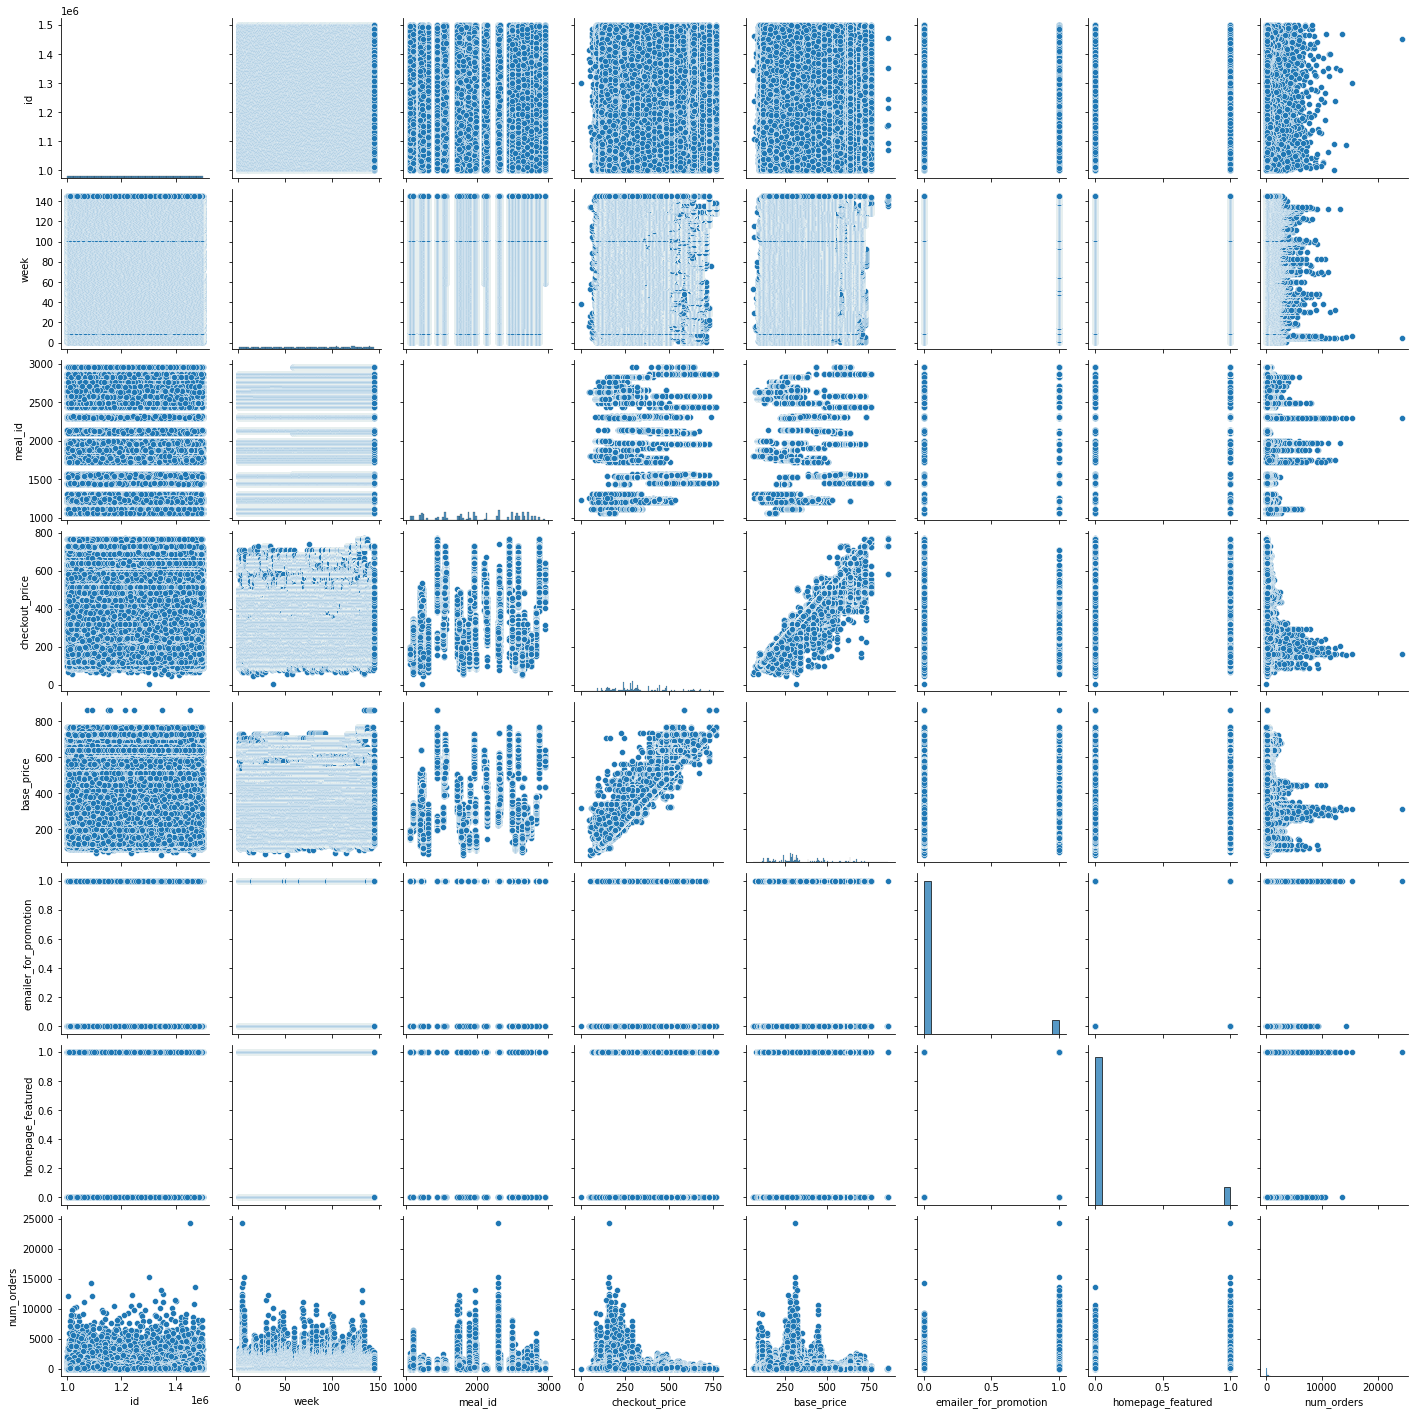

In [ ]:
sns.pairplot(train_ds)

In [ ]:
f_train = train_ds.loc[:,["num_orders","week","center_id","meal_id","checkout_price",
                       "base_price","emailer_for_promotion","homepage_featured"]]
final_train = pd.get_dummies(f_train)

In [ ]:
features = final_train.iloc[:,1:].values
labels = final_train.iloc[:,:1].values

## **Model Buliding**

here we will be using many algorithms and compare all of them. which algorithm will be giving us a Better result. The following algorithms are below.

1. LinearRegression (RMSE: 334.45162241353864)
2. DecisionTreeRegressor (RMSE: 332.8261160204239)
3. RandomForestRegressor (RMSE: 331.0142032987282)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, 
                                                    random_state = 1956)
DTRmodel = DecisionTreeRegressor(max_depth = 3, random_state = 0)
DTRmodel.fit(x_train, y_train)
y_pred = DTRmodel.predict(x_test)

In [ ]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred)))

R2 score  : 0.2616128266882829
MSE score  : 110759.17143620193
RMSE:  332.80500512492586


In [ ]:
#------------------------------------ RandomForestRegressor ---------------------------------------------
X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size=0.20,random_state=33)
RFRmodel = RandomForestRegressor(max_depth=3, random_state=0)
RFRmodel.fit(X_train,y_train)
y_pred = RFRmodel.predict(X_test)

In [ ]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred)))

R2 score  : 0.2588222257323072
MSE score  : 109686.56960335885
RMSE:  331.18962786198307
